In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEES59Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEES59Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteEES59Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#Single Layer LSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 166s 423ms/step - loss: 0.5159 - accuracy: 0.7435 - val_loss: 0.4644 - val_accuracy: 0.8020
Epoch 2/10
391/391 [==============================] - 165s 423ms/step - loss: 0.4157 - accuracy: 0.8256 - val_loss: 0.5420 - val_accuracy: 0.7298
Epoch 3/10
391/391 [==============================] - 160s 410ms/step - loss: 0.4990 - accuracy: 0.7600 - val_loss: 0.3870 - val_accuracy: 0.8390
Epoch 4/10
391/391 [==============================] - 161s 413ms/step - loss: 0.3164 - accuracy: 0.8654 - val_loss: 0.3943 - val_accuracy: 0.8415
Epoch 5/10
391/391 [==============================] - 161s 411ms/step - loss: 0.2132 - accuracy: 0.9202 - val_loss: 0.3544 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 161s 412ms/step - loss: 0.1698 - accuracy: 0.9410 - val_loss: 0.3783 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 160s 408ms/step - loss: 0.1389 - accuracy: 0.9526 - val_loss: 0.4113 -

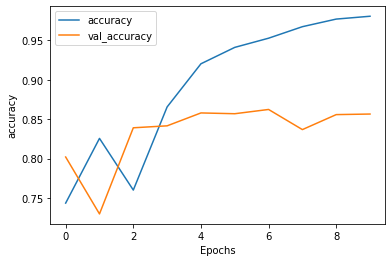

In [12]:
plot_graphs(history, 'accuracy')

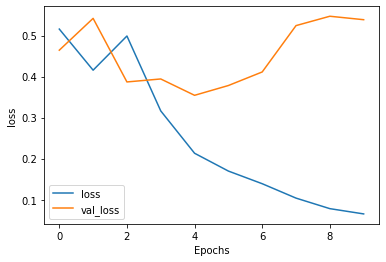

In [13]:
plot_graphs(history, 'loss')